

# Intro

A program for calculating the monthly sales of a business (part 1)

> 

A script for predicting stocks using machine learning models (part 2)

# Task 1 - Sales analysis

A program for calculating the monthly sales of a business

Tasks for part 1
1. Read the data from the spreadsheet
2. Collect all of the sales from each month into a single list
3. Output the total sales across all months

In [ ]:
# Import all the dependencies 

import pandas as pd
import io
import statistics

In [ ]:
# importing sales.csv file (this syntax is needed cant change uploaded to something else)

from google.colab import files
uploaded = files.upload()

Saving sales.csv to sales.csv


In [ ]:
# putting sales data into a dataframe df

df = pd.read_csv(io.BytesIO(uploaded['sales.csv']))

In [ ]:
# Data exploration

df.head() # displays the five first rows of the data

,year,month,sales,expenditure
0,2018,jan,6226,3808
1,2018,feb,1521,3373
2,2018,mar,1842,3965
3,2018,apr,2051,1098
4,2018,may,1728,3046


In [ ]:
# Data exploration
df.tail() # displays the five last rows of the data

,year,month,sales,expenditure
7,2018,aug,4434,2799
8,2018,sep,3615,1649
9,2018,oct,5472,1116
10,2018,nov,7224,1431
11,2018,dec,1812,3532


In [ ]:
# Data exploration
df.shape # shape of the array

(12, 4)

In [ ]:
# Data exploration
df.dtypes # data type of each column

year            int64
month          object
sales           int64
expenditure     int64
dtype: object

In [ ]:
# in the dataframe df, input the value from column sales in df and put it into the list monthly_sales
monthly_sales = df['sales'].values.tolist()
print(monthly_sales)

[6226, 1521, 1842, 2051, 1728, 2138, 7479, 4434, 3615, 5472, 7224, 1812]


In [ ]:
# print the sum of all the monthly sales using method sum()

total_monthly = sum(monthly_sales)
print("the total sales is for the year 2018 is %d" % (total_monthly))

the total sales is for the year 2018 is 45542


In [ ]:
# can also be done as a for loop 
# total_sales set to 0 outside the for loop
# sales in monthly_sales list added to the total_sales variable

total_sales = 0
for sales in monthly_sales:
  total_sales = total_sales + sales

print("The total sales for the year 2018 is {}".format(total_sales))

The total sales for the year 2018 is 45542


In [ ]:
# calculate the mean, import mean() method from statistics library

mean_sales = statistics.mean(monthly_sales)
print("Mean is", mean_sales)

Mean is 3795.1666666666665


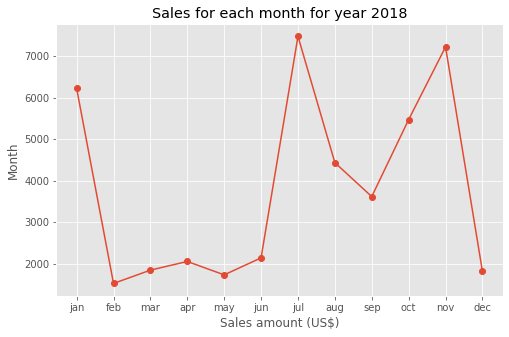

In [ ]:
# Plot of sales against month for year 2018
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.figure(figsize=(8,5))
plt.title("Sales for each month for year 2018")
plt.xlabel("Sales amount (US$)")
plt.ylabel("Month")
plt.plot(df['month'], df['sales'], marker='o')
plt.show()

# Task 2 Part 1 - Decision Tree Regressor Model

A program to predict the Apple stock price using the Decision Tree Regressor machine learning model

Tasks 2 part 1 - Predicting stock values

1. Import stock data from URL
2. Explore data
3. Select ML model
4. Train the ML model (80/20 split)
5. Predict stock value for 30 days ahead 
6. Compare predicted stock value with real stock values

In [ ]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")

In [ ]:
# uploading Apple stock data
from google.colab import files
uploaded = files.upload()

Saving AAPL_stocks.csv to AAPL_stocks (2).csv


In [ ]:
# Load sales data into a dataframe df
df = pd.read_csv("AAPL_stocks.csv")

In [ ]:
# Data exploration
df.shape

(250, 7)

In [ ]:
# Data exploration
# Showing the first 10 entries due to argument of 10
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,04/09/2018,228.410004,229.179993,226.630005,228.360001,223.062759,27390100
1,05/09/2018,228.990005,229.669998,225.100006,226.869995,221.607346,33333000
2,06/09/2018,226.229996,227.350006,221.300003,223.100006,217.924789,34290000
3,07/09/2018,221.850006,225.369995,220.710007,221.300003,216.166550,37619800


In [ ]:
# Data exploration
# showing the last 5 (default argument) entries
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,26/08/2019,205.860001,207.190002,205.059998,206.490005,204.830002,26043600
246,27/08/2019,207.860001,208.550003,203.529999,204.160004,202.518738,25873300
247,28/08/2019,204.100006,205.720001,203.320007,205.529999,203.877731,15938800
248,29/08/2019,208.500000,209.320007,206.660004,209.009995,207.329742,20990500
249,30/08/2019,210.160004,210.449997,207.199997,208.740005,207.061920,21143400


In [ ]:
# Data exploration
# More additional statistical information 
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,192.350800,194.407320,190.316320,192.349680,189.152569,3.278549e+07
std,21.380582,21.521545,21.224628,21.289047,20.861057,1.387042e+07
min,143.979996,145.720001,142.000000,142.190002,139.376251,1.136200e+07
25%,174.737499,175.902496,173.362499,174.757499,171.886303,2.328460e+07
50%,196.364998,198.750000,193.805000,196.345001,193.596649,2.979730e+07
75%,207.622498,209.217502,205.352494,207.675003,204.837441,3.897412e+07
max,230.779999,233.470001,229.779999,232.070007,226.686707,9.624670e+07


In [ ]:
# Data exploration
# General info of the data e.g. type etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
# Plot the data, so Apple stock close price against the days to get the stock price variation over the financial year
plt.title("Apple stock price")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(df["Close"])
plt.show()

axes.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

AttributeError: ignored

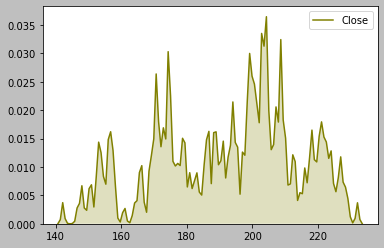

In [ ]:
# An attempt at using seaborn...
import seaborn as sns
sns.kdeplot(df['Close'], shade=True, bw=.5, color="olive")
sns.plt.show()


In [ ]:
# Get the adjusted close value
# Put all the close values in dataframe df and confirm it

df = df[["Close"]]
df.head(4)

,Close
0,228.360001
1,226.869995
2,223.100006
3,221.300003


In [ ]:
# Create a variable storing the number of days x into the future the model will predict the stock value

future_days = 30

# We use the future_days variable to shift the data by the same amount stored in future_days
df["Prediction"] = df[["Close"]].shift(-future_days)
df.tail(5)

,Close,Prediction
245,206.490005,NaN
246,204.160004,NaN
247,205.529999,NaN
248,209.009995,NaN
249,208.740005,NaN


In [ ]:
# create feature data set convert to numpy array and remove last x days
X = np.array(df.drop(["Prediction"], 1))[:-future_days]

In [ ]:
# create target data set y and convert it to numpy array and get all of the t
y = np.array(df["Prediction"])[:-future_days]
print(y)

[222.149994 221.190002 216.020004 219.309998 220.649994 222.729996
 215.089996 219.800003 216.300003 212.240005 213.300003 218.860001
 222.220001 207.479996 201.589996 203.770004 209.949997 208.490005
 204.470001 194.169998 192.229996 186.800003 191.410004 193.529999
 185.860001 176.979996 176.779999 172.289993 174.619995 174.240005
 180.940002 179.550003 178.580002 184.820007 176.690002 174.720001
 168.490005 169.600006 168.630005 169.100006 170.949997 165.479996
 163.940002 166.070007 160.889999 156.830002 150.729996 146.830002
 157.169998 156.149994 156.229996 157.740005 157.919998 142.190002
 148.259995 147.929993 150.75     153.309998 153.800003 152.289993
 150.       153.070007 154.940002 155.860001 156.820007 153.300003
 153.919998 152.699997 157.759995 156.300003 154.679993 165.25
 166.440002 166.520004 171.25     174.179993 174.240005 170.940002
 170.410004 169.429993 170.889999 170.179993 170.800003 170.419998
 170.929993 172.029999 171.059998 172.970001 174.229996 174.330002

In [ ]:
# split data into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
# Initialize Decision Tree Regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [ ]:

x_future = df.drop(["Prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[190.149994],
       [192.580002],
       [194.809998],
       [194.190002],
       [194.149994],
       [192.740005],
       [193.889999],
       [198.449997],
       [197.869995],
       [199.460007],
       [198.779999],
       [198.580002],
       [195.570007],
       [199.800003],
       [199.740005],
       [197.919998],
       [201.550003],
       [202.729996],
       [204.410004],
       [204.229996],
       [200.020004],
       [201.240005],
       [203.229996],
       [201.75    ],
       [203.300003],
       [205.210007],
       [204.5     ],
       [203.350006],
       [205.660004],
       [202.589996]])

In [ ]:
# Show model Decision Tree Regressor prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[199.740005 208.839996 208.669998 156.149994 207.740005 209.679993
 190.919998 193.339996 208.429993 204.020004 193.339996 193.339996
 199.039993 203.429993 200.990005 200.479996 208.970001 202.75
 201.740005 192.580002 203.429993 210.360001 212.639999 212.460007
 202.639999 206.490005 204.160004 205.529999 190.149994 208.740005]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


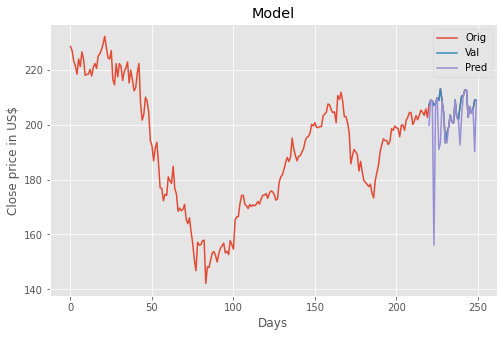

In [ ]:
# Visualize data and compare the model with original values

predictions = tree_prediction

valid = df[X.shape[0]:]
valid["Predictions"] = predictions

plt.figure(figsize=(8,5))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close price in US$")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()

<Figure size 288x144 with 0 Axes>

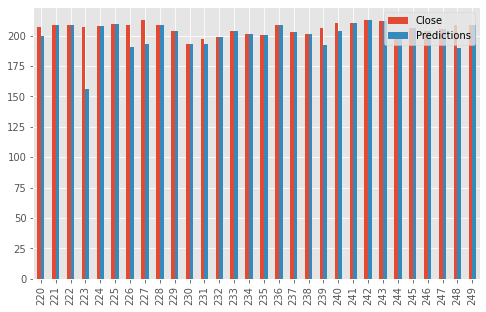

In [ ]:
plt.figure(figsize=(4,2))
df1 = valid[["Close", "Predictions"]]
df1.plot(kind='bar',figsize=(8,5))

plt.show()

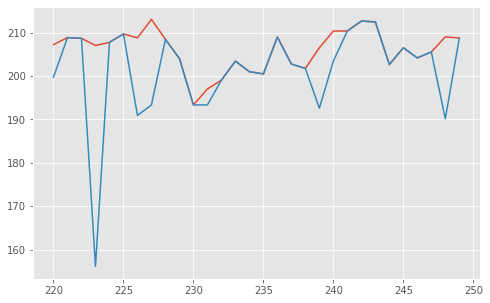

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(valid[["Close", "Predictions"]])

# Task 2 Part 2 - Long Short Term Memory Model

***This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of Apple using past 30 day stock price.***



For this project I aimed to achieve the following task:

- Import data from a web source
- Present the data
- Visualise the data (Closing price, Adjusted close & high and low)
- Create a new column in the data frame
- Scale data
- Compile the model
- Train data using 80/20 split
- Plot a graph
- Reshape the data into the shape accepted by the LSTM
- Plot/Create the data for the graph
- Predict the closing price

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#Get the stock data from Yahoo
df = web.DataReader('AAPL', data_source='yahoo', start='2018-08-04', end='2019-08-30') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-06,209.250000,207.070007,208.000000,209.070007,25425400.0,203.506500
2018-08-07,209.500000,206.759995,209.320007,207.110001,25587400.0,201.598648
2018-08-08,207.809998,204.520004,206.050003,207.250000,22525500.0,201.734955
2018-08-09,209.779999,207.199997,209.529999,208.880005,23492600.0,203.321579
2018-08-10,209.100006,206.669998,207.360001,207.529999,24611200.0,202.715927
...,...,...,...,...,...,...
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.830002
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,202.518738
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,203.877731


In [ ]:
# Data exploration
df.dtypes # data type of each column

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [ ]:
#Showing the number of rows and columns
df.shape

(270, 6)

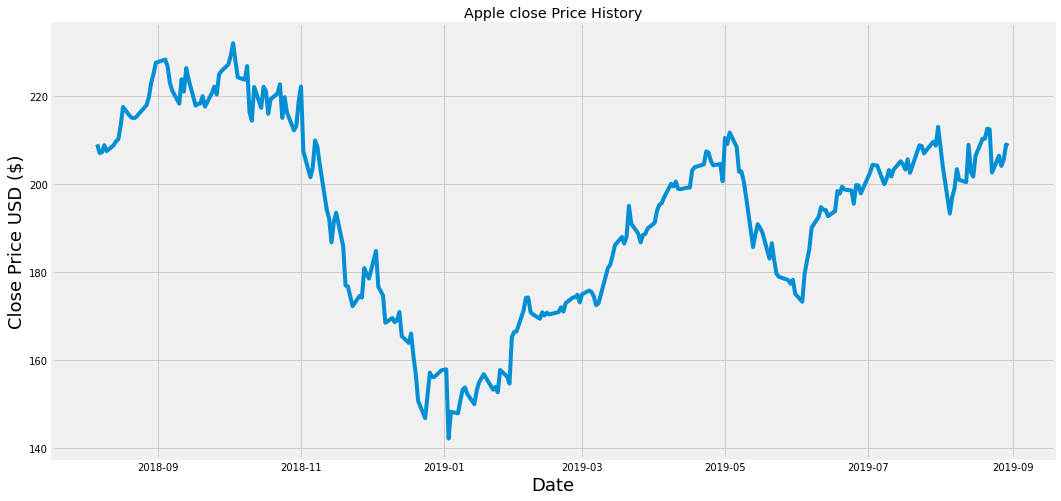

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Apple close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model.(Training is 80%)
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(30,len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
186/186 [==============================] - 5s 27ms/step - loss: 0.0175


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 30: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
#Get all of the rows from index 170 to the rest and all of the columns (in this case it's only column 'Close'), so 270 - 170 = 100 rows of data
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) #Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

13.20747334388345

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


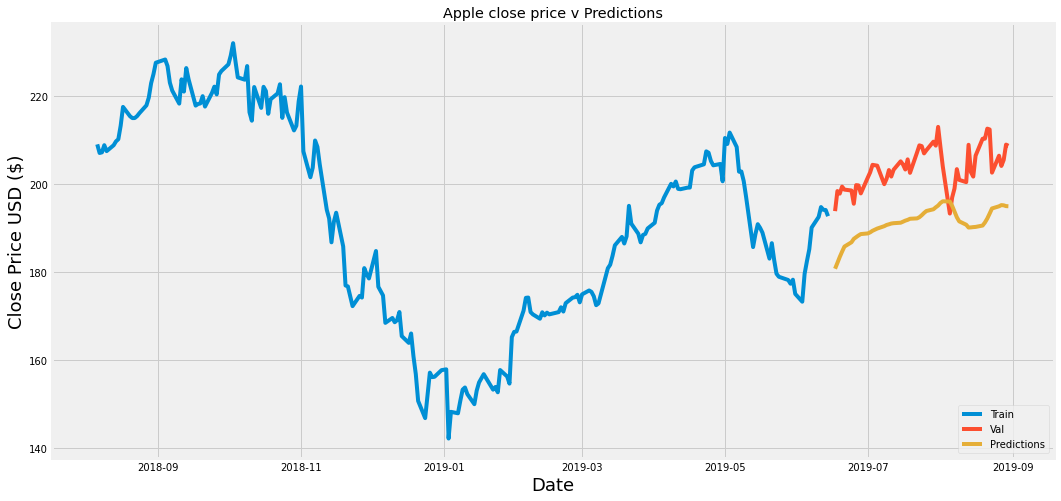

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data with the original value and predictions
plt.figure(figsize=(16,8))
plt.title('Apple close price v Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-06-17,193.889999,180.793381
2019-06-18,198.449997,182.114914
2019-06-19,197.869995,183.459229
2019-06-20,199.460007,184.678986
2019-06-21,198.779999,185.830139
2019-06-24,198.580002,186.805313
2019-06-25,195.570007,187.579132
2019-06-26,199.800003,187.971497
2019-06-27,199.740005,188.349442
